# LSTM for Bonn University Epilepsy Dataset

A | B | C | D | E
--- | --- | --- | --- | ---
*Non-Epileptic* | *Non-Epileptic* | `Epileptic` | `Epileptic` | `Epileptic`
Eyes Opened | Eyes Closed | Interictal | Interictal | Ictal

In [1]:
# Will enable Google Colab specific code. If you run locally, put it to False.
GColab = False

if GColab:
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/Z.zip  # Set A
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/O.zip  # Set B
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/N.zip  # Set C
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/F.zip  # Set D
  !wget http://epileptologie-bonn.de/cms/upload/workgroup/lehnertz/S.zip  # Set E

  !unzip Z.zip -d 'Set A'
  !unzip O.zip -d 'Set B'
  !unzip N.zip -d 'Set C'
  !unzip F.zip -d 'Set D'
  !unzip S.zip -d 'Set E'

In [5]:
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
if GColab:
  !pip install tqdm
  
import os
from tqdm import tqdm

if GColab:
  DATA_DIR_A = './Set A/'
  DATA_DIR_B = './Set B/'
  DATA_DIR_C = './Set C/'
  DATA_DIR_D = './Set D/'
  DATA_DIR_E = './Set E/'
else:
  DATA_DIR_A = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set A/'
  DATA_DIR_B = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set B/'
  DATA_DIR_C = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set C/'
  DATA_DIR_D = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set D/'
  DATA_DIR_E = '/Users/yannick/Cortex/HackerFest/Epilepsy/Bonn University/Set E/'
  
LABEL_C1 = 0
LABEL_C2 = 1
LABEL_C3 = 2

def load_data():
    data = []
    nbFiles = 0
    for fname in tqdm(os.listdir(DATA_DIR_A)):
        img = np.loadtxt(DATA_DIR_A + fname)
        data.append([img, np.array(LABEL_C1)])
        nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_B)):
    #    img = np.loadtxt(DATA_DIR_B + fname)
    #    data.append([img, np.array(LABEL_C1)])
    #    nbFiles+=1    
    
    #for fname in tqdm(os.listdir(DATA_DIR_C)):
    #    img = np.loadtxt(DATA_DIR_C + fname)
    #    data.append([np.array(img), np.array(LABEL_C2)])
    #    nbFiles+=1

    #for fname in tqdm(os.listdir(DATA_DIR_D)):
    #    img = np.loadtxt(DATA_DIR_D + fname)
    #    data.append([np.array(img), np.array(LABEL_C2)])
    #    nbFiles+=1

    for fname in tqdm(os.listdir(DATA_DIR_E)):
        img = np.loadtxt(DATA_DIR_E + fname)
        data.append([np.array(img), np.array(LABEL_C2)])
        nbFiles+=1
        
    return data


data = load_data()
print(len(data), "Files")

100%|██████████| 100/100 [00:01<00:00, 61.28it/s]

200  Files


# Visualize your data!

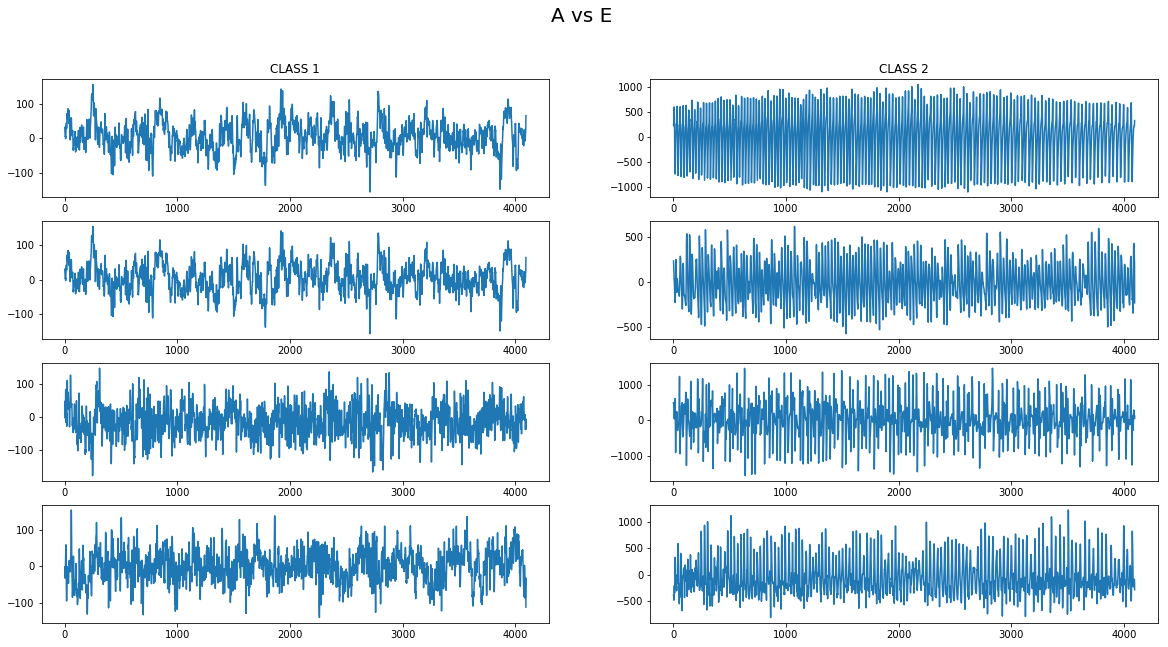

In [8]:
import random
mpl.rcParams['figure.figsize'] = (20,10)

fig = plt.figure()

samples_c1 = np.empty((0, 4097), int)
while len(samples_c1) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C1:
        samples_c1 = np.vstack((samples_c1, data[curID][0]))
        
samples_c2 = np.empty((0, 4097), int)
while len(samples_c2) < 4:
    curID = random.randint(0, len(data))
    if data[curID][1] == LABEL_C2:
        samples_c2 = np.vstack((samples_c2, data[curID][0]))
        
for i in range(0, 4):
    plt.subplot(421 + i * 2)
    plt.plot(samples_c1[i])
    plt.subplot(421 + i * 2 + 1)
    plt.plot(samples_c2[i])

ax = plt.subplot(421)
ax.set_title("CLASS 1")
ax = plt.subplot(422)
ax.set_title("CLASS 2")

fig.suptitle("A vs E", fontsize=20)
plt.show()

# Prepare your data!

In [9]:
from sklearn.utils import shuffle
data = shuffle(data)

nb_train = round(len(data) * 0.8)
data_train = data[0:nb_train]
data_test = data[nb_train:]

X_train = np.array([d[0] for d in data_train])
Y_train = np.array([d[1] for d in data_train])

X_test = np.array([d[0] for d in data_test])
Y_test = np.array([d[1] for d in data_test])

X_train.shape
    
X_train = X_train.reshape(X_train.shape[0], 4097, 1)
Y_train = Y_train.reshape(Y_train.shape[0], 1)

X_test = X_test.reshape(X_test.shape[0], 4097, 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM

#num_steps = 30
batch_size = 4
nb_epoch = 20
hidden_size = 64
use_dropout=True

model = Sequential()
model.add(LSTM(hidden_size, input_shape=(4097,1)))
#model.add(LSTM(64, return_sequences=False))

if use_dropout:
  model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

print(model.summary())

history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, nb_epoch=nb_epoch)
score = model.evaluate(X_test, Y_test, batch_size=batch_size)

#checkpointer = ModelCheckpoint(filepath=data_path + '/model-{epoch:02d}.hdf5', verbose=1)


# 1 LSTM with 64 (4097,1)
# Adam, Binary_CrossEntropy, Batch Size 4, Epoch 20
# --> 99 - 100% Accuracy (A <-> E)

Using TensorFlow backend.
/Users/yannick/anaconda/envs/tensorflow35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
None


/Users/yannick/anaconda/envs/tensorflow35/lib/python3.5/site-packages/ipykernel/__main__.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 128 samples, validate on 32 samples
Epoch 1/20
128/128 [==============================] - 118s 920ms/step - loss: 0.5100 - mean_absolute_error: 0.3721 - acc: 0.7812 - val_loss: 0.4445 - val_mean_absolute_error: 0.3445 - val_acc: 0.7500

dict_keys(['mean_absolute_error', 'val_mean_absolute_error', 'loss', 'acc', 'val_acc', 'val_loss'])


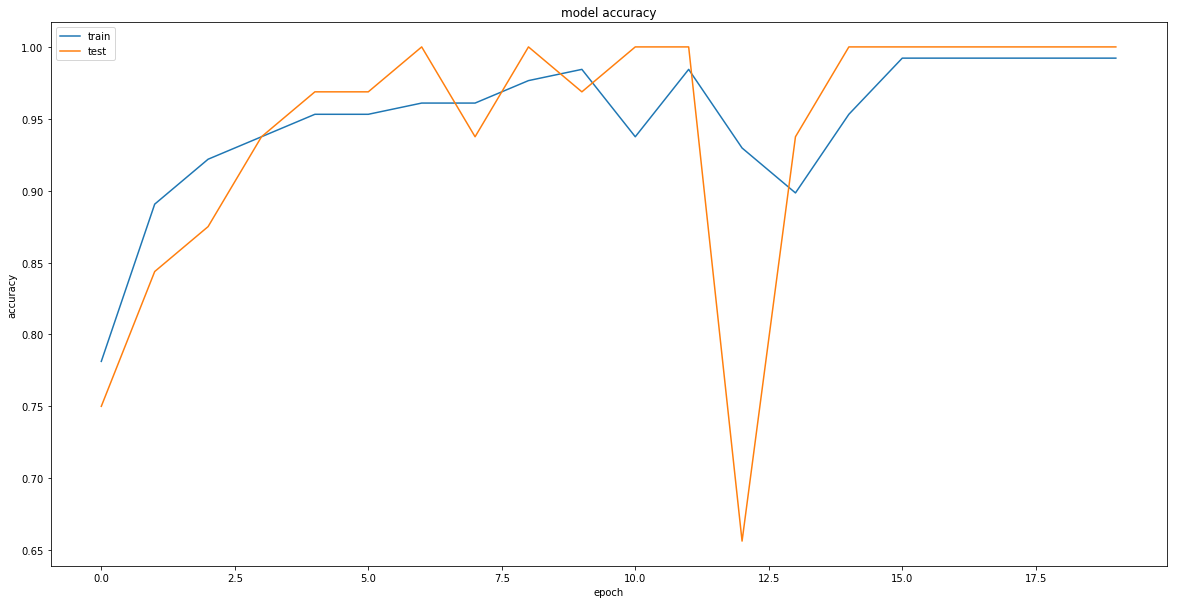

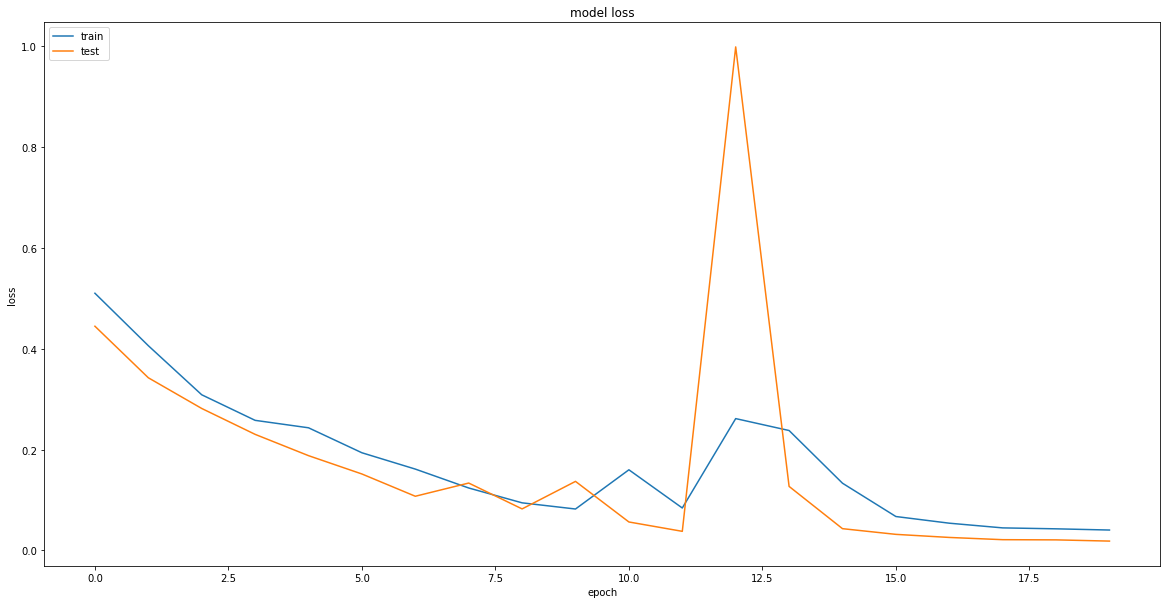

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()